In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = pd.read_csv('data.csv')

## 1. Описание датасета
### Данный датасет содержит данные о 569 случаях онкологических заболеваний 

#### Атрибуты:
id -- ID number  
diagnosis -- диагноз опухоли груди (M = злокачественная, B = доброкачественная)
 
#### Фичи:

radius -- расстояние от центра до точки на периметре  
texture -- стандартное отклонение на черно-белых изображениях (gray-scale values)  
perimeter -- размер опухоли  
area -- область опухоли  
smoothness -- локальное изменение длины радиуса  
compactness -- perimeter^2 / area - 1.0  
concavity -- выраженность вогнутых участков контура  
concave points -- количество вогнутых частей контура  
symmetry -- симметрия  
fractal_dimension -- "coastline approximation" - 1

###### Среднее для соответствующих признаков: feature_mean
###### Стандарная ошибка для соответствующих фичей: feature_se
###### «Xудшее» значение для соответствующих фичей: feature_worst

In [3]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Посмотрим, как обстоят дела с NA:

In [4]:
cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

В довольно подозрительной колонке все значения заполнены NA. Дропнем эту колонку, чтобы она не мешала дальнейшему анализу. Также дропнем колонку с идентификаторами

In [5]:
cancer = cancer.drop(['Unnamed: 32'], axis=1)
cancer = cancer.drop(['id'], axis=1)

In [6]:
# Автоматический профайлинг, но жрёт огромное количество памяти, что делает его использование невыносимым.
# from pandas_profiling import ProfileReport
# prof = ProfileReport(cancer)
# prof.to_file(output_file='output.html')

Несмотря на то, что у нас есть 10 признаков, на каждый из которых в качестве фичи мы имеет среднее значение, среднее отклонение и худшую оценку.
Поэтому построим pairplot для средних значений признаков.

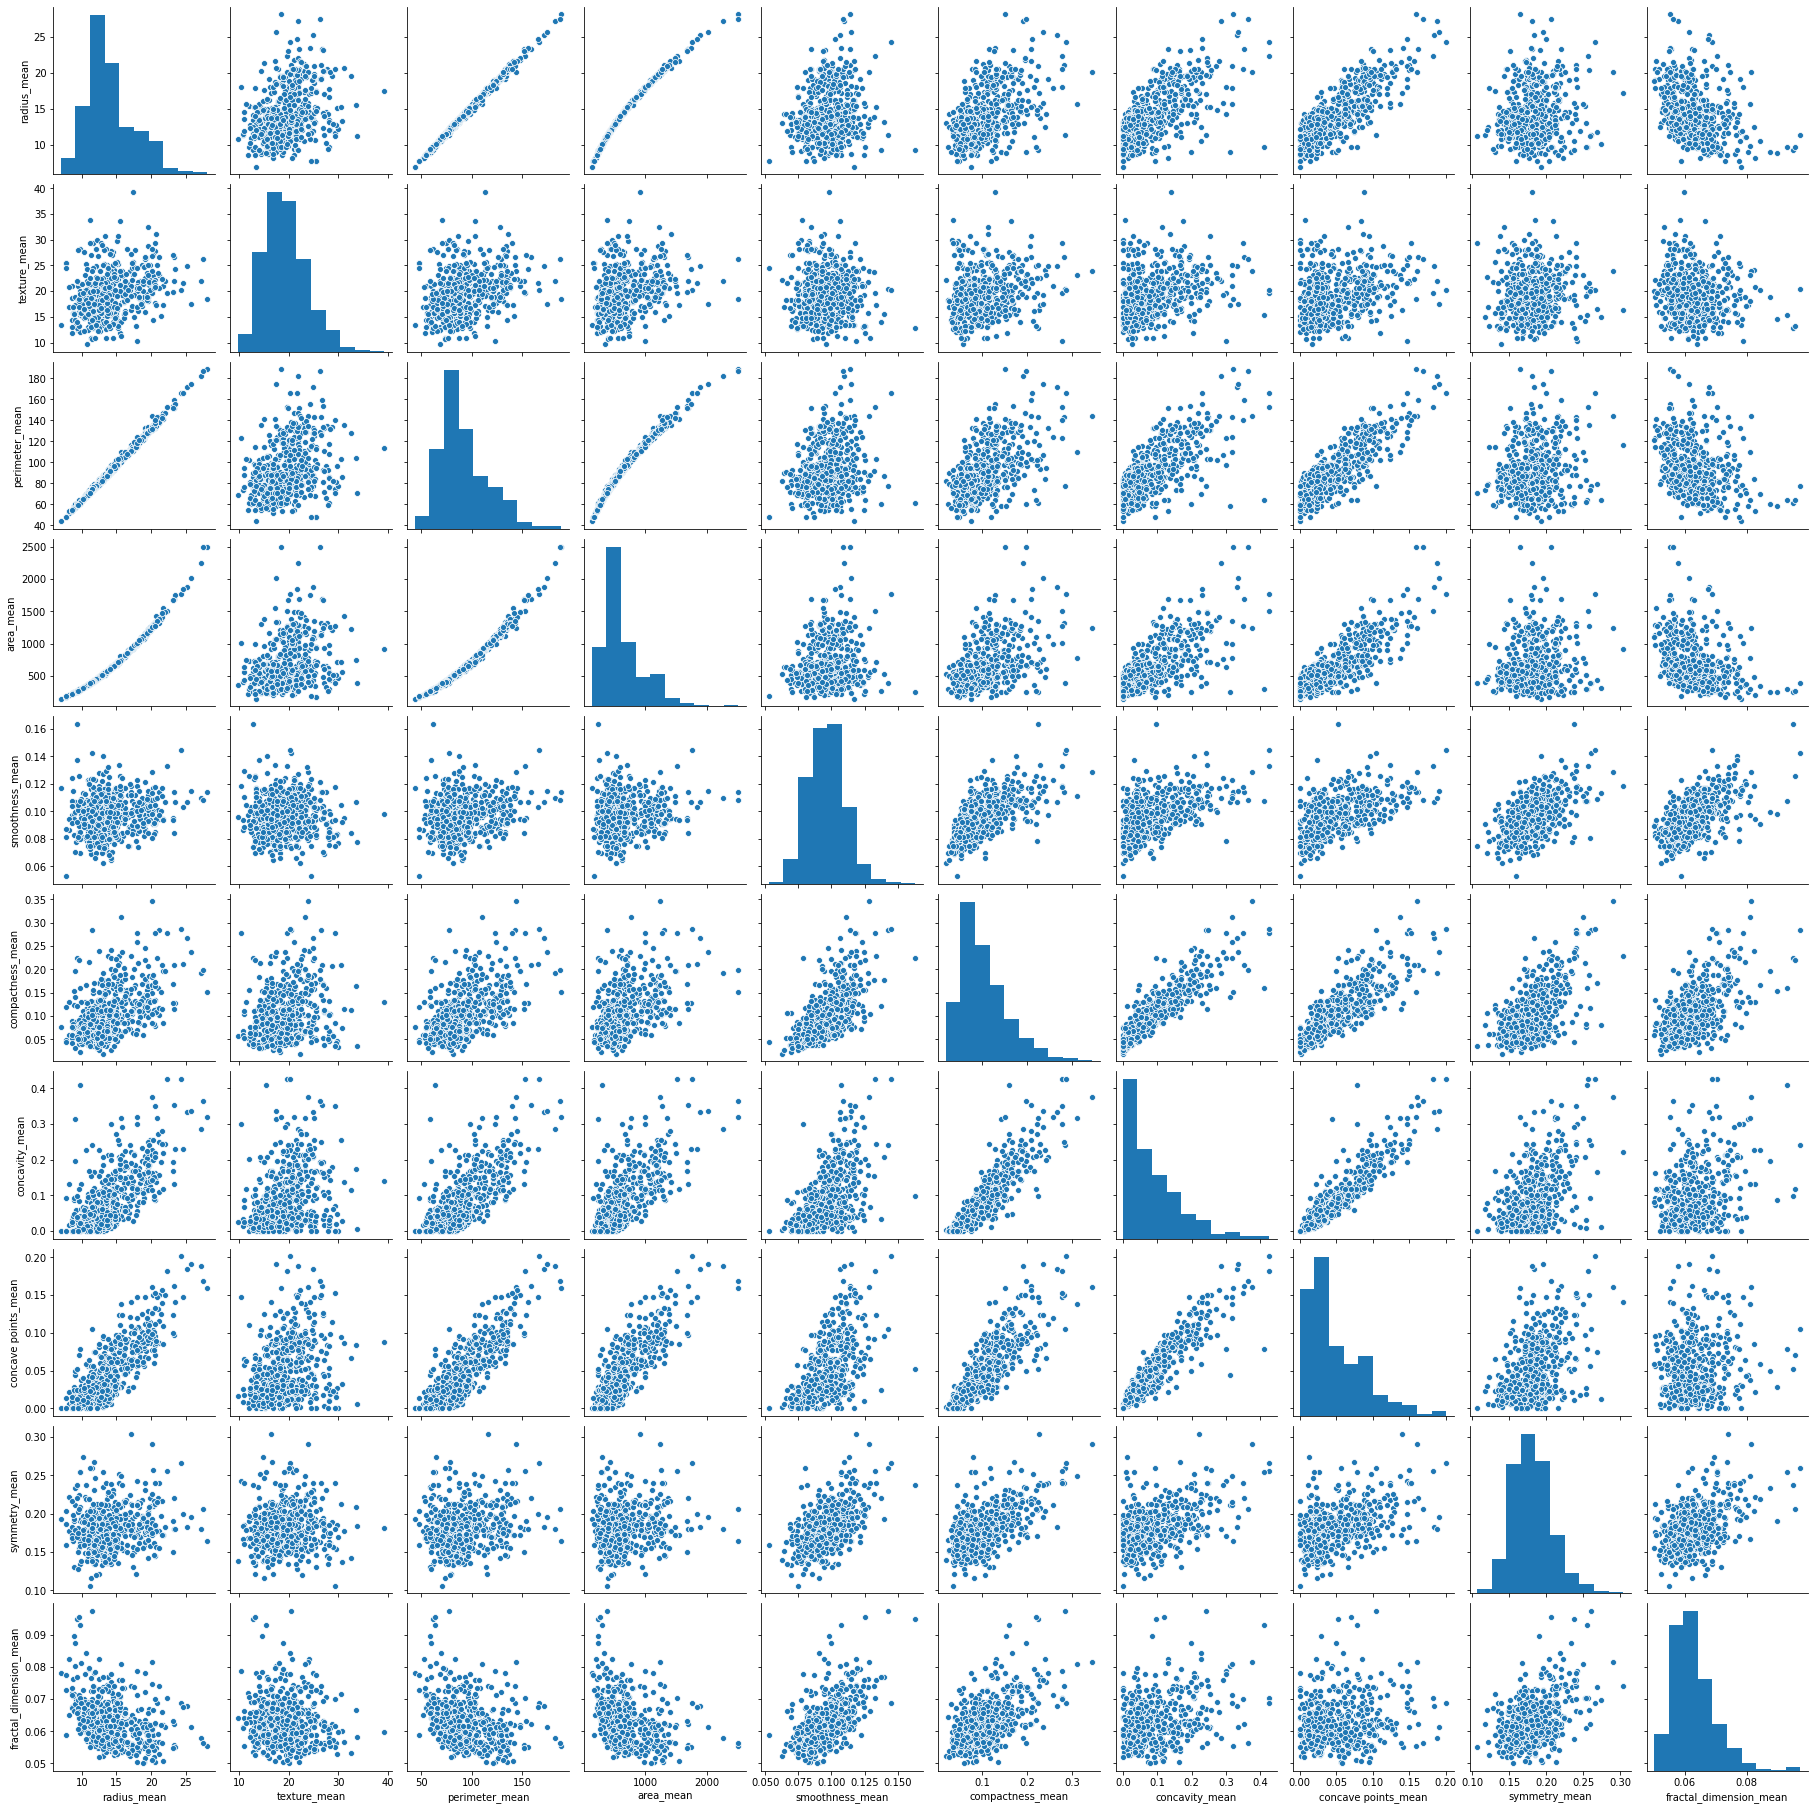

In [7]:
sns.pairplot(cancer.iloc[:, 1:11])

Довольно очевидно, что у нас имеется сильная корреляция между значениями радиуса, области и периметра опухоли. Также есть некоторая корреляция межлу компактностью опухоли и ее вогнутостью (притом в общем виде, потому что некоторая корреляция также есть и между выраженностью вогнутости и количеством точек вогнутости).

## 2. Далее будем обучать классификатор.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

In [9]:
X = cancer.drop(['diagnosis'], axis=1)
y = cancer.diagnosis

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, shuffle=True, random_state=42)

In [11]:
log_regr_clf = LogisticRegression(random_state=0)
log_regr_clf.fit(X_train, y_train)

/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. Посмотрим на метрики качества классификатора:

In [12]:
y_pred_test = log_regr_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           B       0.92      0.99      0.96       118
           M       0.98      0.86      0.92        70

    accuracy                           0.94       188
   macro avg       0.95      0.92      0.94       188
weighted avg       0.94      0.94      0.94       188



Для злокачественных опухолей довольно хорошая точность (precision), но не такой высокий recall (что довольно важно при определении злокачественной опухоли). Попробуем немного сбалансировать модель таким образом, чтобы за счет небольшого уменьшения точности увеличить recall.
f1-score является мерой чувствительности теста. Для нашего классификатора она имеет вполне удовлетворительное значение.

In [13]:
log_regr_clf = LogisticRegression(random_state=0, class_weight='balanced')
log_regr_clf.fit(X_train, y_train)
y_pred_test = log_regr_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       118
           M       0.97      0.89      0.93        70

    accuracy                           0.95       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.95      0.95      0.95       188



/home/xomaiya/.conda/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4. Построим ROC кривую для нашего классификатора.

In [14]:
def get_roc_auc(estimator, y_test):
    probs = estimator.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def get_roc_auc_inv(estimator, y_test):
    probs = estimator.predict_proba(X_test)
    preds = probs[:,0]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

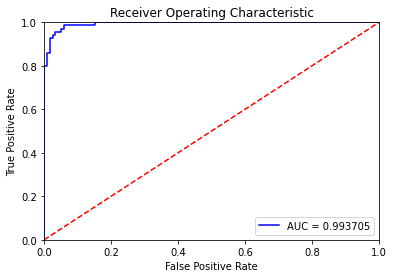

In [15]:
get_roc_auc(log_regr_clf, y_test == 'M')

Получили замечательную ROC-AUC